# Labwork Bayes Decision

## Synthetic Data

Question 1 

In [44]:
import numpy as np
from utility_bayes import gen_data_twogaussians_2d
# class 1
n1 = 100
mu1 = np.array([0, 2]); S1 = 1.5*np.array([[1, 0.1], [0.1, 1]])
# class 2
n2 = n1
mu2 = np.array([-2, -2]); S2 = S1
X_train, Y_train = gen_data_twogaussians_2d(mu1, S1, mu2, S2, n1, n2)

Question 2 

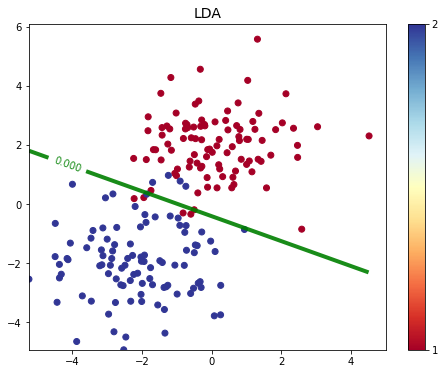

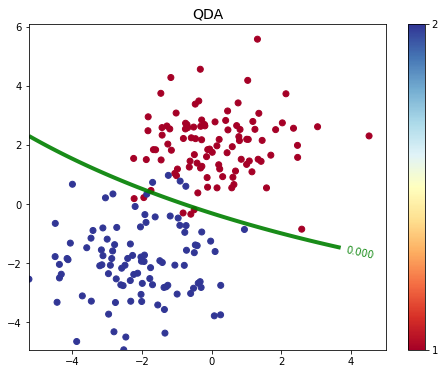

In [45]:
from utility_bayes import plot_decision_regions_2d

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf_lda.fit(X_train, Y_train)
plot_decision_regions_2d(X_train, Y_train, clf_lda, resolution=0.02, title="LDA")


#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X_train, Y_train)
plot_decision_regions_2d(X_train, Y_train, clf_qda, resolution=0.02, title="QDA")

The results are satisfactory since we can clearly see the two separate data sets. The form of the frontier decision allows us to see the shape of the 2 data sets.

In [10]:
print(clf_lda.covariance_)
print(clf_qda.covariance_)

[[1.43123193 0.23055505]
 [0.23055505 1.46187023]]
[array([[1.6158486 , 0.27025203],
       [0.27025203, 1.50422107]]), array([[1.27552904, 0.19551575],
       [0.19551575, 1.44905212]])]


Question 3 

In [11]:
# class 1
n1 = 100
mu1 = np.array([0, 2]); S1 = 1.5*np.array([[1, 0.1], [0.1, 1]])
# class 2
n2 = n1
mu2 = np.array([-2, -2]); S2 = 2.5*S1
X_train, Y_train = gen_data_twogaussians_2d(mu1, S1, mu2, S2, n1, n2)

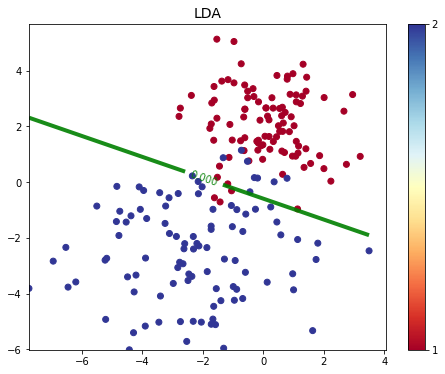

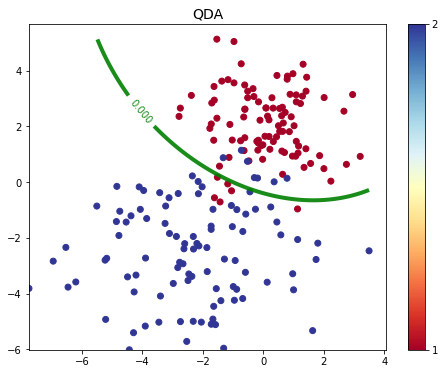

In [12]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf_lda.fit(X_train, Y_train)
plot_decision_regions_2d(X_train, Y_train, clf_lda, resolution=0.02, title="LDA")


#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X_train, Y_train)
plot_decision_regions_2d(X_train, Y_train, clf_qda, resolution=0.02, title="QDA")

In [15]:
# class 1
n1 = 100
mu1 = np.array([0, 2]); S1 = 1.5*np.array([[1, 0.1], [0.1, 1]])
# class 2
n2 = n1
mu2 = np.array([-2, -2]); S2 = S1+np.eye(2)*2.5
X_train, Y_train = gen_data_twogaussians_2d(mu1, S1, mu2, S2, n1, n2)

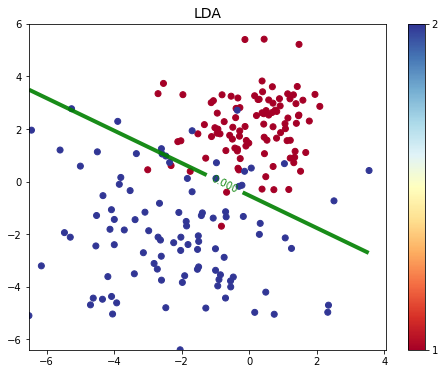

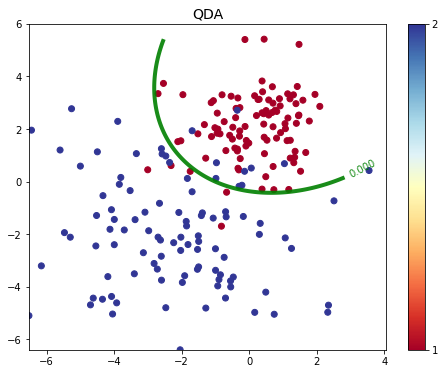

In [16]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf_lda.fit(X_train, Y_train)
plot_decision_regions_2d(X_train, Y_train, clf_lda, resolution=0.02, title="LDA")


#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X_train, Y_train)
plot_decision_regions_2d(X_train, Y_train, clf_qda, resolution=0.02, title="QDA")

Question 4 

In [46]:
from sklearn.metrics import accuracy_score

#LDA

pred_lda = clf_lda.predict(X_train)
acc_train_lda = accuracy_score(pred_lda, Y_train)
print("LDA : accuracy = {}%".format(100*acc_train_lda))

#QDA
pred_qda = clf_qda.predict(X_train)
acc_train_qda = accuracy_score(pred_qda, Y_train)
print("QDA : accuracy = {}%".format(100*acc_train_qda))

LDA : accuracy = 96.0%
QDA : accuracy = 95.5%


## 2 White dwarfs and the starts

Question 1 

In [25]:
import scipy.io as sio

filename = "astrodata.mat"
X = sio.loadmat(filename)["X"]
Y = np.squeeze(sio.loadmat(filename)["Y"])

Question 2 

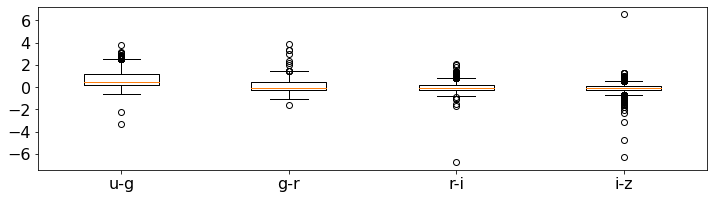

<Figure size 576x504 with 0 Axes>

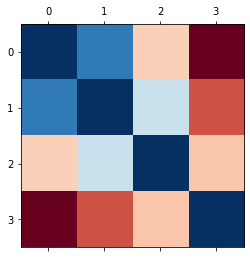

In [28]:
# Statistical analysis
import matplotlib.pyplot as plt

# boxplot of the input variables and the output
plt.figure(figsize=(12, 3))
variables = ["u-g", "g-r", "r-i", "i-z"]
plt.boxplot(X, vert=True, labels=variables)
plt.xticks(fontsize=16); plt.yticks(fontsize=16);

# Correlation matrix
plt.figure(figsize=(8, 7))
correlation_matrix = np.corrcoef(np.transpose(X)) #remark: we need to transpose X
plt.matshow(correlation_matrix, cmap=plt.cm.RdBu)


The boxplots are quite similar, there's no variable too far from the other or too big or too small. 
The correlation matrix shows are correlation between u-g and g-r and inverse correlation between u-g and i-z.





Question 3 



In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.5, stratify=Y)

We need to split the data to have 2 data sets that are identically distributed. The easiest way to do so is to use subsets from one set. We shuffle to not have pattern after the split. And we use stratify to keep the dimension.! 

Question 4 

In [50]:
from sklearn.preprocessing import StandardScaler

# define the scaler
sc = StandardScaler(with_mean=True, with_std=True)

# set the parameters of the scaler using training data
sc = sc.fit(X_train)

# apply the so set scaler to normalize the data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

The normalization is performed by taking the parameters from X_train and applying them to X_train and X_test to normalize. It is to not have one variable showing more importance than the others.

Question 5

In [51]:
clf_lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf_lda.fit(X_train, Y_train)


pred_lda = clf_lda.predict(X_test)
acc_test_lda = accuracy_score(pred_lda, Y_test)
print("LDA : accuracy = {}%".format(100*acc_test_lda))

pred_lda = clf_lda.predict(X_train)
acc_train_lda = accuracy_score(pred_lda, Y_train)
print("LDA : accuracy = {}%".format(100*acc_train_lda))



LDA : accuracy = 97.59308510638299%
LDA : accuracy = 96.96768187258944%


Question 6 

In [52]:
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X_train, Y_train)

pred_qda = clf_qda.predict(X_test)
acc_test_qda = accuracy_score(pred_qda, Y_test)
print("QDA : accuracy = {}%".format(100*acc_test_qda))


pred_qda = clf_qda.predict(X_train)
acc_train_qda = accuracy_score(pred_qda, Y_train)
print("QDA : accuracy = {}%".format(100*acc_train_qda))

QDA : accuracy = 96.875%
QDA : accuracy = 96.80808618167309%


The LDA is more accurate than the QDA but the difference is not significative. 

## Cat and grass

Question 1 

In [58]:
train_cat = np.array(np.loadtxt("train_cat.txt", delimiter = ","))
train_grass = np.array(np.loadtxt("train_grass.txt", delimiter = ","))


# define sample arrays and label vector for cat and grass
train_cat = np.transpose(train_cat)
y_cat = np.ones(train_cat.shape[0])
train_grass = np.transpose(train_grass)
y_grass = np.zeros(train_grass.shape[0])


# form the classification problem
X_train = np.concatenate((train_cat, train_grass), axis=0)
Y_train = np.concatenate((y_cat, y_grass), axis=0)

Question 2 

In [59]:
train_cat.shape, train_grass.shape

((1976, 64), (9556, 64))

The grass has more than 4 times more samples than the cats. It is not balanced.

Question 3 

In [60]:
clf_qda_cat = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda_cat.fit(X_train, Y_train)

pred_qda = clf_qda_cat.predict(X_train)
acc_test_qda = accuracy_score(pred_qda, Y_train)
print("QDA : accuracy = {}%".format(100*acc_test_qda))


QDA : accuracy = 89.02185223725286%


Question 4 

In [61]:
Xtest = plt.imread("cat_grass.jpg")
Xtest = Xtest / 255

In [62]:
M, N = Xtest.shape
Output_qda = np.zeros((M,N))
for i in range(M-8):
    for j in range(N-8):
        z = Xtest[i:i+8, j:j+8]
        # flatten z
        z = z.flatten()
        #classify the patch
        ypred = clf_qda_cat.predict(z.reshape(1, -1)) #the reshape is required to complywith the parameters of "predict" method of clf_qda_cat
        Output_qda[i,j] = ypred

Question 5 

Text(0.5, 1.0, 'Predictions')

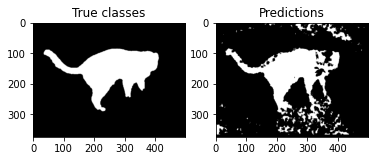

In [63]:
ground_truth = plt.imread("truth.png")


plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap = "gray"); plt.title("True classes")
plt.subplot(1, 2, 2)
plt.imshow(Output_qda*255, cmap = "gray"); plt.title("Predictions")

The results are satisfactory, we can clearly see the cat with our prediction. But it is still not the ground truth.

In [88]:
type, val = np.unique(abs(Output_qda - ground_truth), return_counts = True)
type,val

(array([0., 1.]), array([170615,  16885]))

In [89]:
from utility_bayes import binarize_ground_truth
import pandas as pd

cols,rows = ground_truth.shape
ground_truth = binarize_ground_truth(ground_truth)
accuracy = val[0]/(val[0]+val[1])

accuracy



0.9099466666666667

Question 6

LDA : accuracy = 82.8650711064863%


Text(0.5, 1.0, 'Predictions')

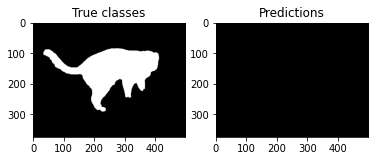

In [68]:
train_cat = np.array(np.loadtxt("train_cat.txt", delimiter = ","))
train_grass = np.array(np.loadtxt("train_grass.txt", delimiter = ","))


# define sample arrays and label vector for cat and grass
train_cat = np.transpose(train_cat)
y_cat = np.ones(train_cat.shape[0])
train_grass = np.transpose(train_grass)
y_grass = np.zeros(train_grass.shape[0])


# form the classification problem
X_train = np.concatenate((train_cat, train_grass), axis=0)
Y_train = np.concatenate((y_cat, y_grass), axis=0)


clf_lda_cat = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf_lda_cat.fit(X_train, Y_train)

pred_lda = clf_lda_cat.predict(X_train)
acc_train_lda = accuracy_score(pred_lda, Y_train)
print("LDA : accuracy = {}%".format(100*acc_train_lda))

M, N = Xtest.shape
Output_lda = np.zeros((M,N))
for i in range(M-8):
    for j in range(N-8):
        z = Xtest[i:i+8, j:j+8]
        # flatten z
        z = z.flatten()
        #classify the patch
        ypred = clf_lda_cat.predict(z.reshape(1, -1)) #the reshape is required to complywith the parameters of "predict" method of clf_qda_cat
        Output_lda[i,j] = ypred
        

plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap = "gray"); plt.title("True classes")
plt.subplot(1, 2, 2)
plt.imshow(Output_lda*255, cmap = "gray"); plt.title("Predictions")

In [90]:
type, val = np.unique(abs(Output_lda - ground_truth), return_counts = True)

cols,rows = ground_truth.shape
ground_truth = binarize_ground_truth(ground_truth)
accuracy = val[0]/(val[0]+val[1])

accuracy


0.82328